In [545]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [546]:
house = pd.read_csv(r"C:\Users\HP\Desktop\CSV files\df1.csv")
house

,sn,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150.0,67 965.56
1,2,house,Nuevo León,25.688436,-100.198807,186.0,63 223.78
2,3,apartment,Guerrero,16.767704,-99.764383,82.0,84 298.37
3,4,apartment,Guerrero,16.829782,-99.911012,150.0,94 308.80
4,5,house,Veracruz de Ignacio de la Llave,NaN,NaN,175.0,94 835.67
...,...,...,...,...,...,...,...
695,696,house,Morelos,NaN,NaN,310.0,237 089.17
696,697,house,Yucatán,21.050653,-89.558841,334.0,137 017.34
697,698,house,Yucatán,21.343796,-89.262060,130.0,110 404.35
698,699,apartment,Nuevo León,NaN,NaN,155.0,184 446.42


In [547]:
house = house.dropna()
house.isnull().sum()
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sn             583 non-null    int64  
 1   property_type  583 non-null    object 
 2   state          583 non-null    object 
 3   lat            583 non-null    float64
 4   lon            583 non-null    float64
 5   area_m2        583 non-null    float64
 6   price_usd      583 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 36.4+ KB


In [548]:
house['price_usd'] = house['price_usd'].replace(" ", "", regex=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_3840\2191228527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price_usd'] = house['price_usd'].replace(" ", "", regex=True)


In [561]:
house['price_usd'] = house['price_usd'].astype('float')
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sn             583 non-null    int64  
 1   property_type  583 non-null    object 
 2   state          583 non-null    object 
 3   lat            583 non-null    float64
 4   lon            583 non-null    float64
 5   area_m2        583 non-null    float64
 6   price_usd      583 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 36.4+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_3840\262621266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['price_usd'] = house['price_usd'].astype('float')


<AxesSubplot:>

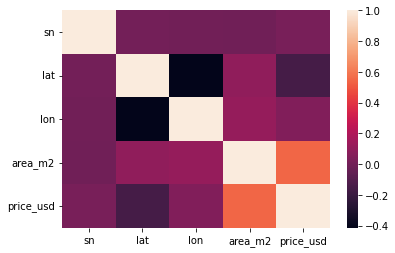

In [550]:
#data visualization
sns.heatmap(house.corr())

In [564]:
x = house.iloc[:,1:5]
y = house.iloc[:,6].values
x = x.iloc[:, :-1].values

In [552]:
labelencoder = LabelEncoder()
x[:, 0] = labelencoder.fit_transform(x[:,0])
x[:, 1] = labelencoder.fit_transform(x[:,1])
x

array([[1, 7, 19.560181],
       [1, 14, 25.6884355],
       [0, 9, 16.767704],
       ...,
       [1, 25, 21.0506531],
       [1, 25, 21.3437962237],
       [1, 16, 20.587378]], dtype=object)

In [553]:
#train dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [554]:
y_train

array([176541.57,  65873.72,  43213.16, 118572.7 , 139652.29,  53225.96,
       173865.39, 109587.88, 135931.12, 189716.32,  66911.83, 113302.8 ,
        39524.23, 242415.29,  39514.86, 152790.8 ,  51644.99,  95309.84,
        84298.37, 142287.24,  89040.15,  40645.77,  67965.56,  79048.46,
       207057.88,  34246.21,  88270.78, 173865.39,  82875.83, 270872.74,
        81664.04,  50052.15, 125950.55, 134382.39,  39514.86,  77325.47,
       104846.1 ,  67438.69,  73761.07, 121207.64, 188398.84, 147557.13,
        92542.77, 112402.96,  79029.72, 326656.19, 135085.08,  63223.78,
        84298.37, 137017.34, 131716.2 , 110641.61, 201310.09,  84318.36,
        47417.83,  36775.16, 118386.52,  55320.8 ,  34781.32, 237145.4 ,
       149928.59,  77572.89, 115937.75,  39514.86, 155425.12, 105372.96,
        89588.26,  71653.61,  42969.88,  94308.8 ,  34599.16,  34254.33,
        65858.1 , 118544.58,  81630.71, 168636.73,  46840.27,  50052.15,
       147522.15, 210743.21, 130873.22,  52698.97, 

In [555]:
y_train

array([176541.57,  65873.72,  43213.16, 118572.7 , 139652.29,  53225.96,
       173865.39, 109587.88, 135931.12, 189716.32,  66911.83, 113302.8 ,
        39524.23, 242415.29,  39514.86, 152790.8 ,  51644.99,  95309.84,
        84298.37, 142287.24,  89040.15,  40645.77,  67965.56,  79048.46,
       207057.88,  34246.21,  88270.78, 173865.39,  82875.83, 270872.74,
        81664.04,  50052.15, 125950.55, 134382.39,  39514.86,  77325.47,
       104846.1 ,  67438.69,  73761.07, 121207.64, 188398.84, 147557.13,
        92542.77, 112402.96,  79029.72, 326656.19, 135085.08,  63223.78,
        84298.37, 137017.34, 131716.2 , 110641.61, 201310.09,  84318.36,
        47417.83,  36775.16, 118386.52,  55320.8 ,  34781.32, 237145.4 ,
       149928.59,  77572.89, 115937.75,  39514.86, 155425.12, 105372.96,
        89588.26,  71653.61,  42969.88,  94308.8 ,  34599.16,  34254.33,
        65858.1 , 118544.58,  81630.71, 168636.73,  46840.27,  50052.15,
       147522.15, 210743.21, 130873.22,  52698.97, 

In [556]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [557]:
y_pred = regressor.predict(x_test)

In [558]:
regressor.coef_

array([-8755.17386087,  -842.84169808, -3352.14211859])

In [559]:
regressor.intercept_

202751.98726743762

In [560]:
r2_score(y_pred, y_test)

-19.3670360080595